# Amazon Customer Segmentation ML Project
---
>##    project outlines :
>##### 1 -  Understand the dataset
>##### 2 -  Data cleaning
>##### 3 -  Feature Engineering and preprocessing
>##### 4 -  Clustering


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import tensorflow as tf

Mounted at /content/drive


## Understanding &  description of  the dataset


In [2]:
# loading the dataset
file_path = 'Amazon Customer Behavior Survey.csv'
data = pd.read_csv(file_path)
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [3]:
# the shape of the data & the columns of the dataset
data.shape,data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

((602, 23), None)

The data has no null values except for the `Product_Search_Method` column, which needs to be filled before visualization.
___

In [4]:
# filling with the mode
data["Product_Search_Method"].replace(np.nan,'categories',inplace=True)

In [ ]:
# some important central tendencies of categorical columns
data.describe(include=['object'])

,Timestamp,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Service_Appreciation,Improvement_Areas
count,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602
unique,601,4,5,29,3,4,4,2,3,5,4,5,2,5,3,3,9,18
top,2023/06/07 11:47:44 AM GMT+5:30,Female,Few times a month,Beauty and Personal Care,No,Few times a week,categories,Multiple pages,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Yes,Sometimes,Product recommendations,Customer service responsiveness
freq,2,352,203,106,251,249,225,442,248,304,255,251,310,199,237,273,185,217



##Data visualization
###1) Numeric data

* Use histograms to understand distributions


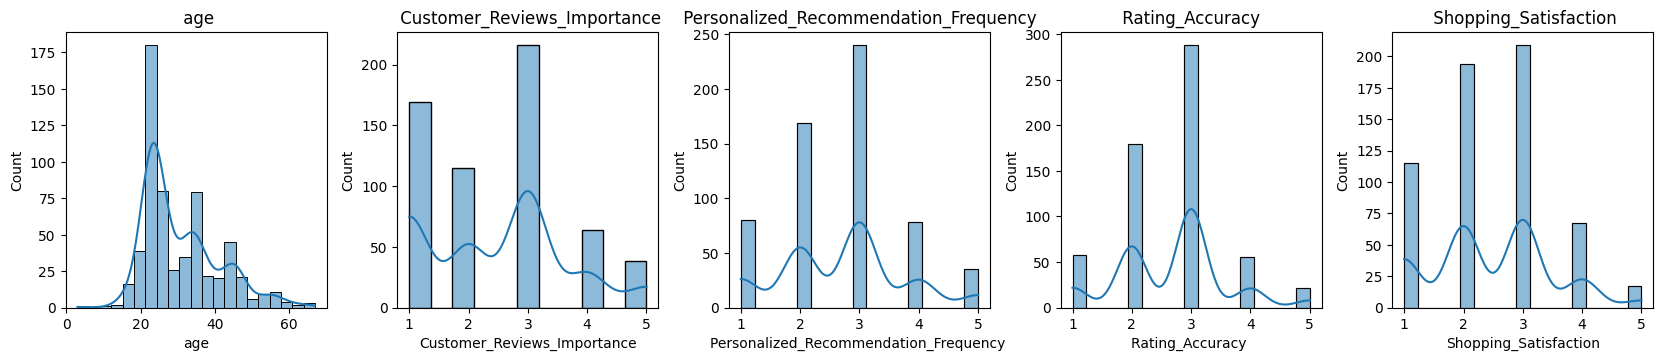

In [5]:
# distributions of Numeric data
num_cols = data.select_dtypes(include = ['int64','float64'])
plt.figure(figsize=(30,30))
for i, col in enumerate(num_cols,1):
    plt.subplot(9,9,i)
    sns.histplot(data[col],kde =True)
    plt.title(f' {col}')
plt.tight_layout()
plt.show()

There are only 5 numeric columns in the dataset, so no further validation is needed.

---


##2) categorical data
* count plot to see the frequency or count of each category

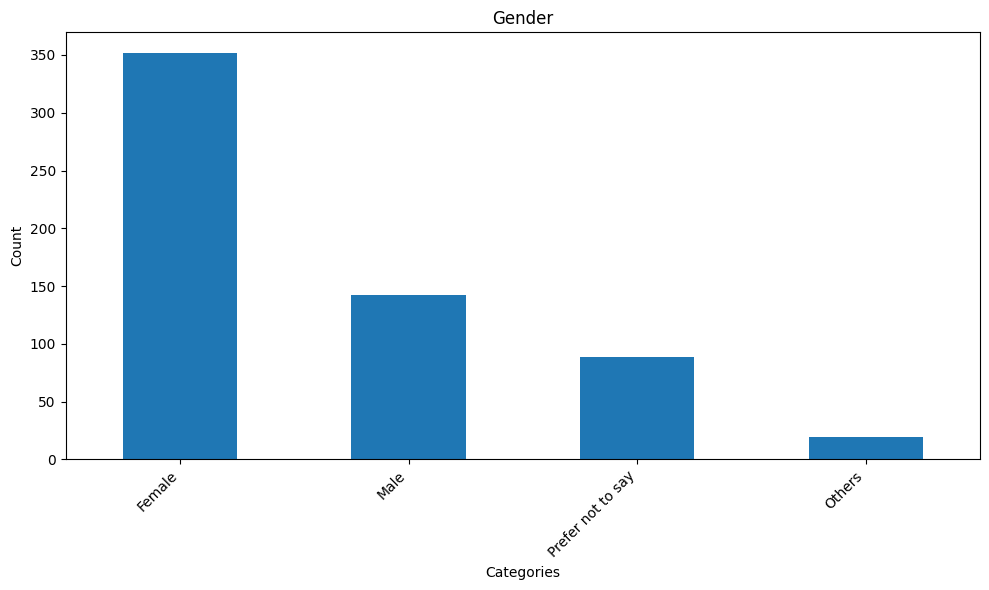

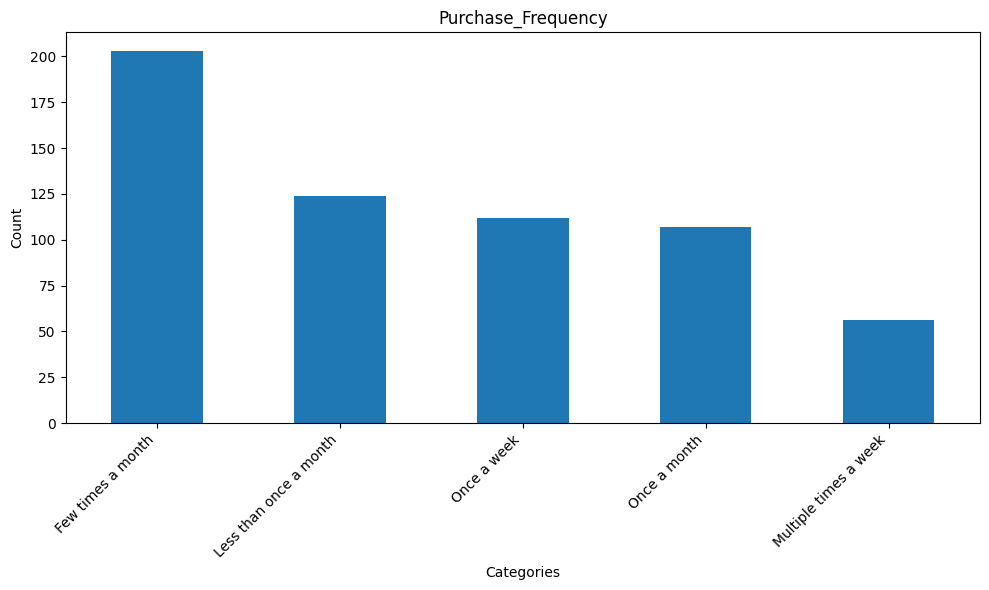

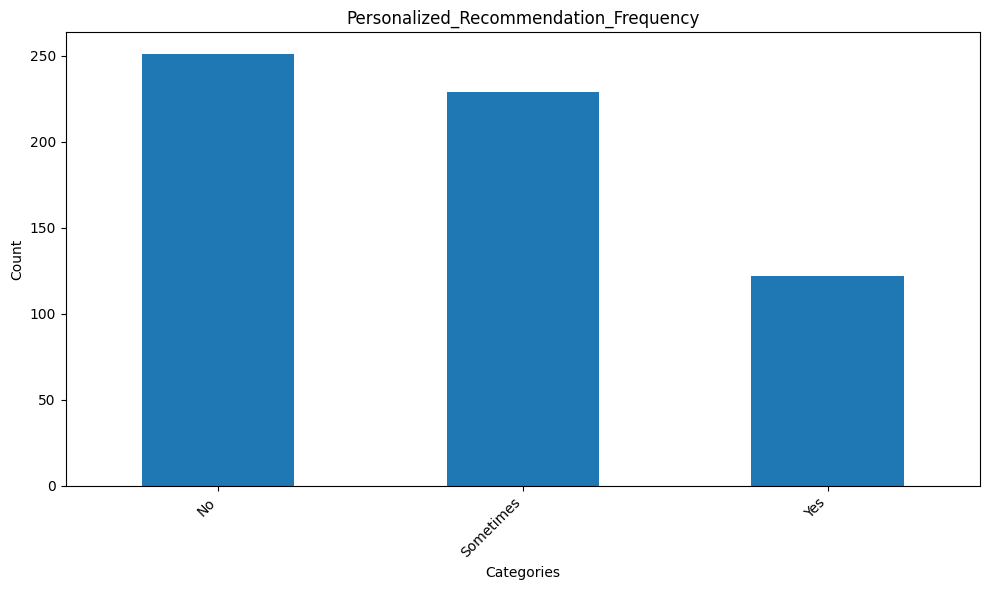

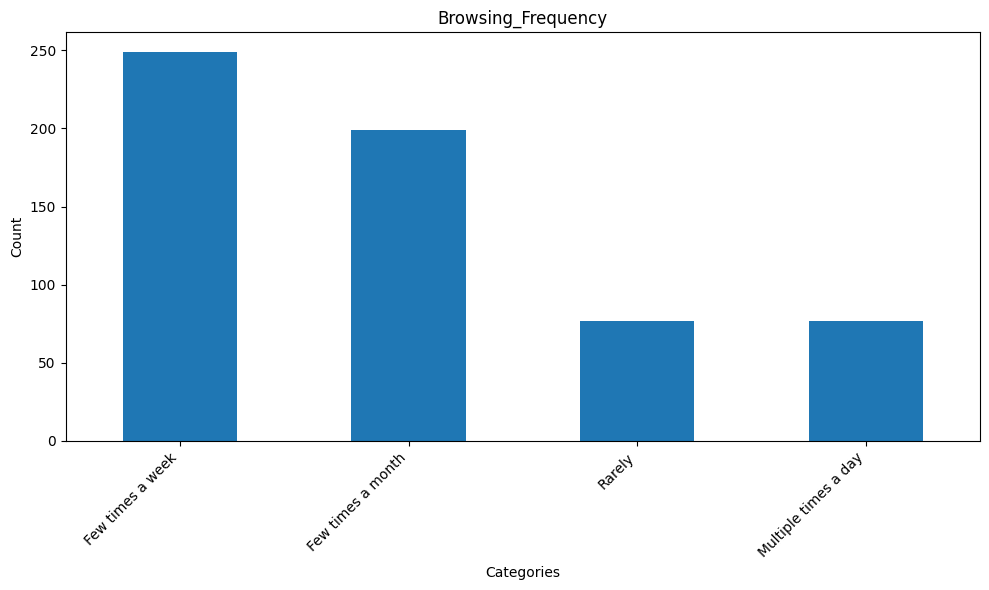

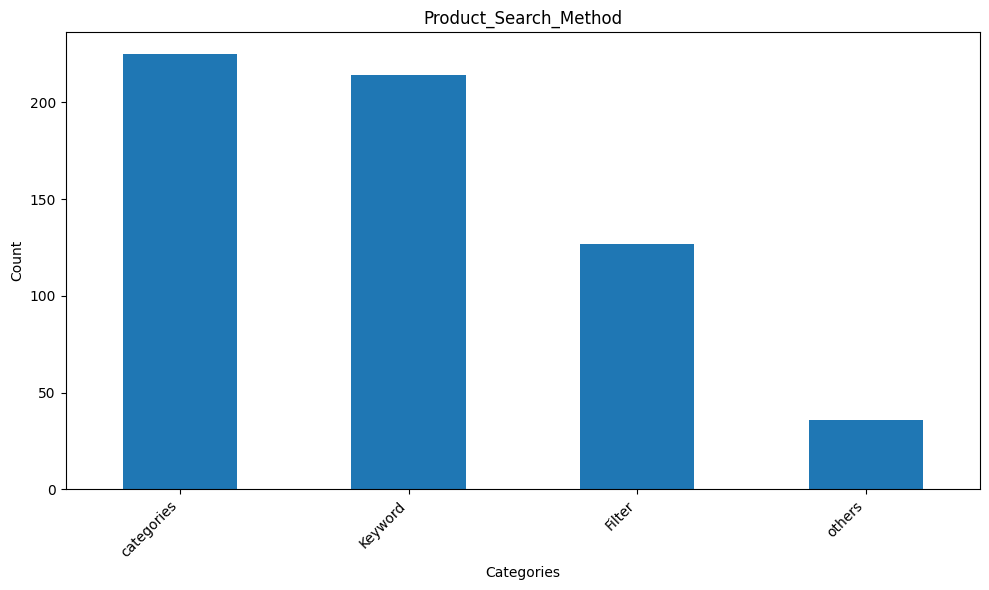

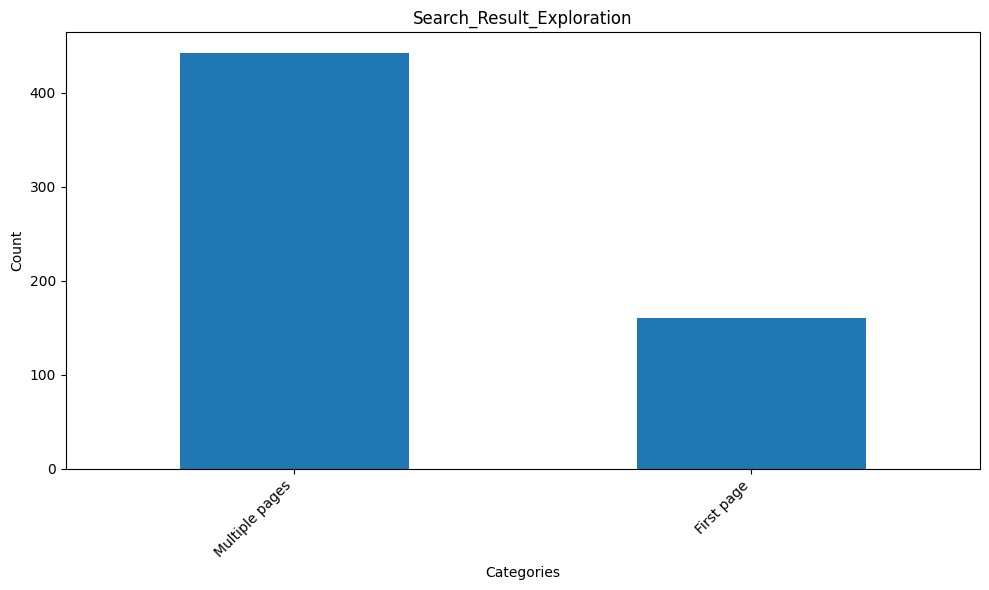

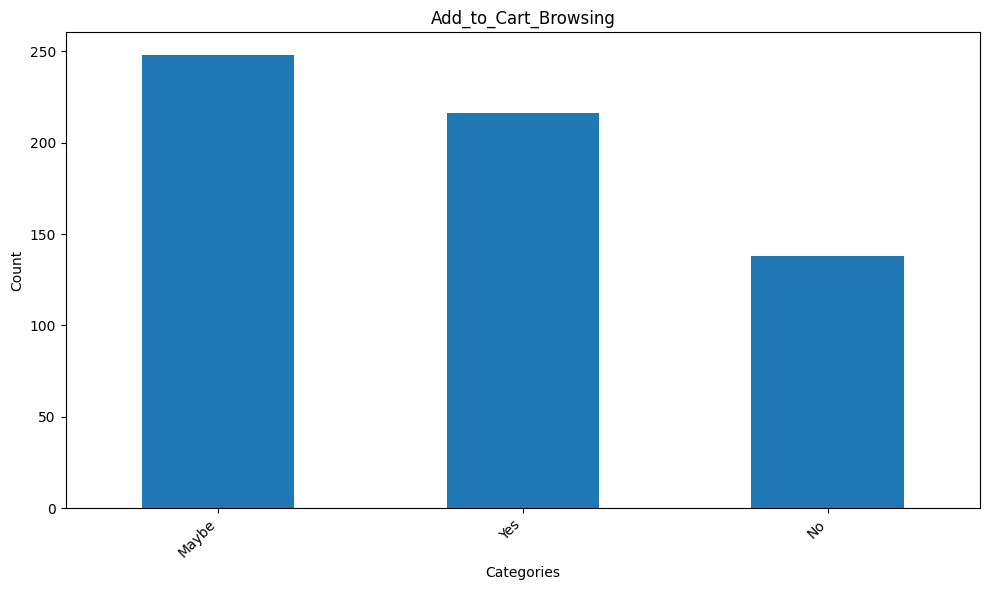

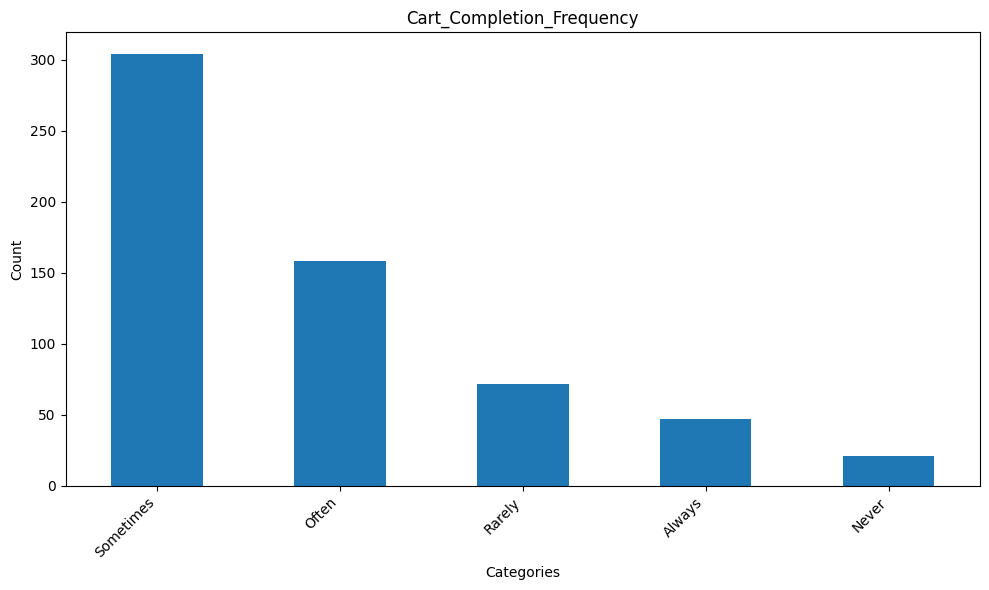

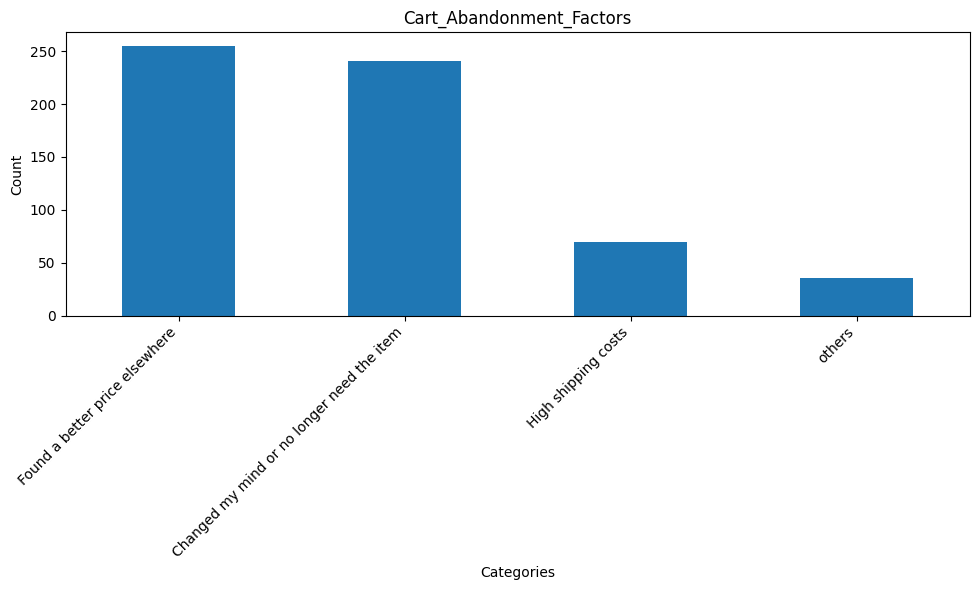

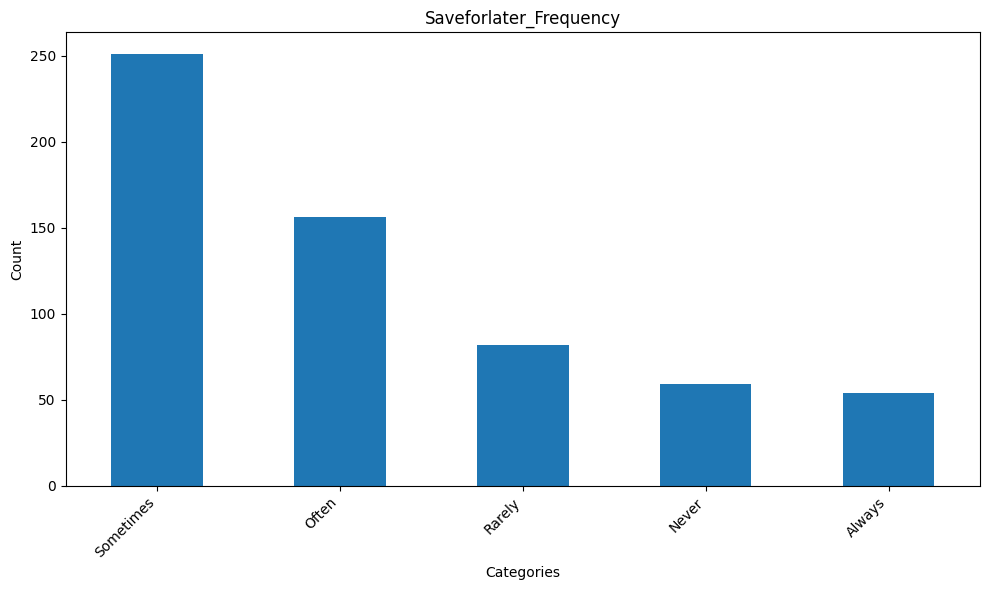

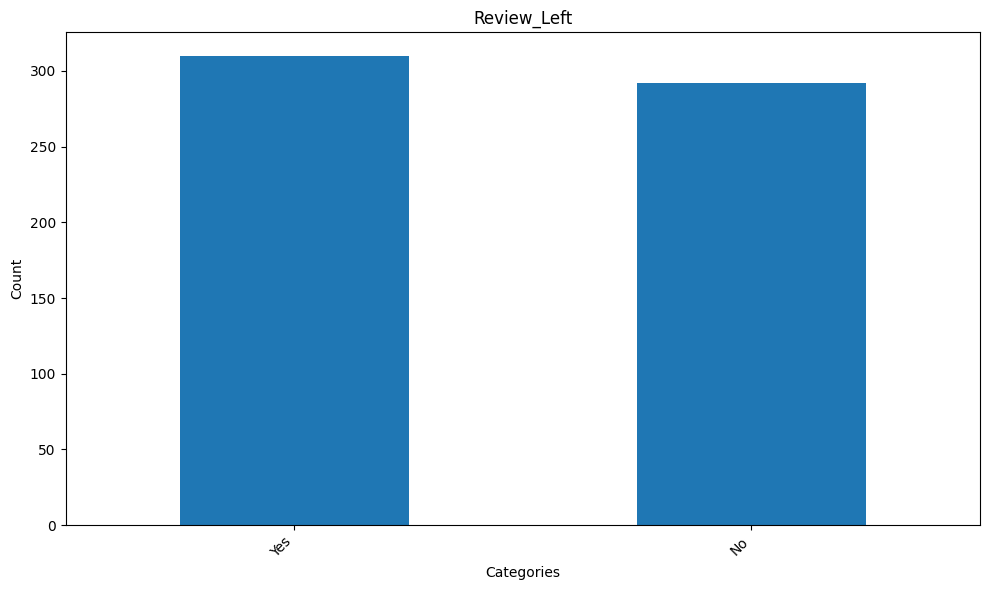

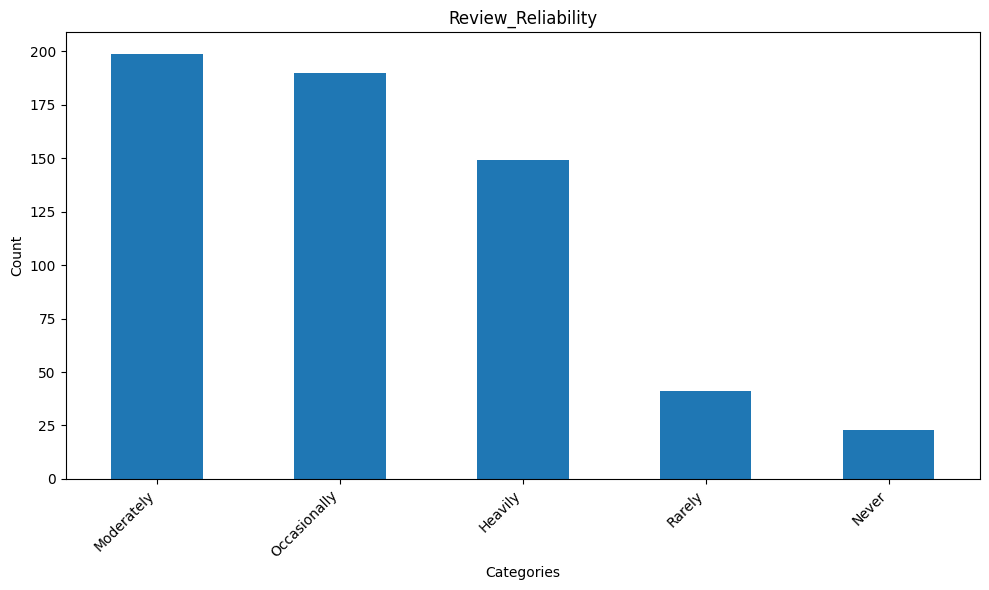

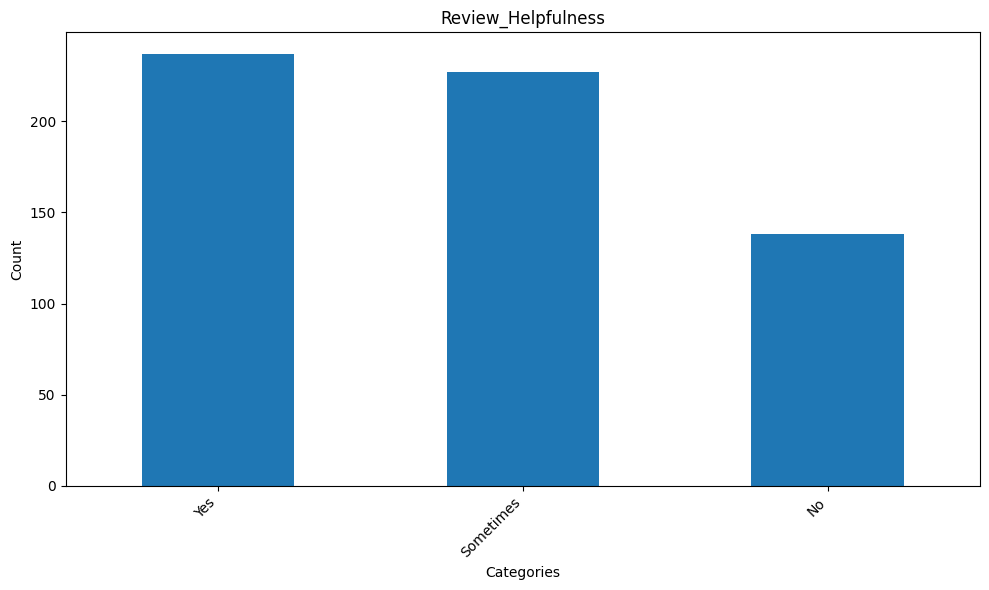

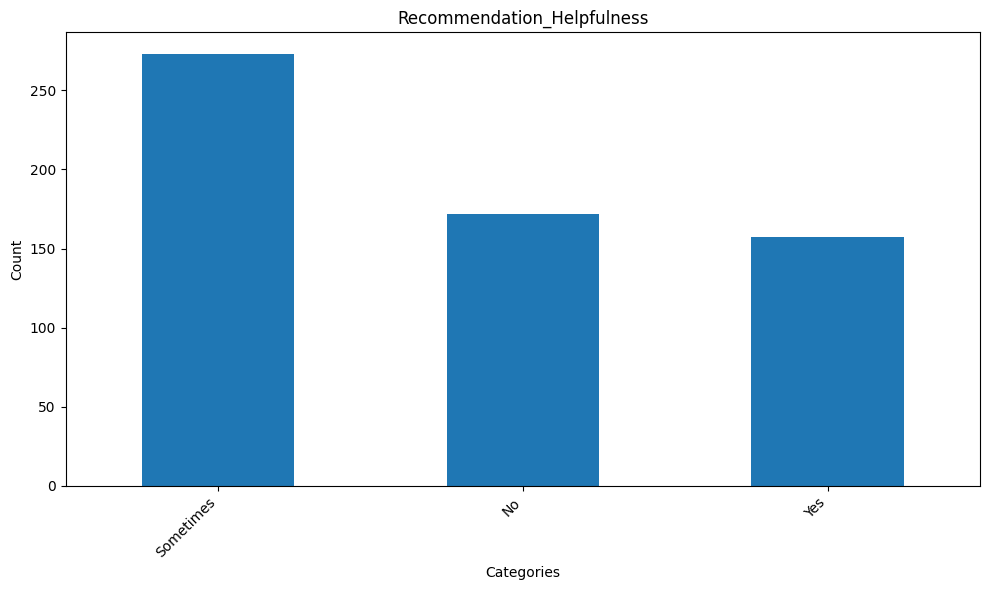

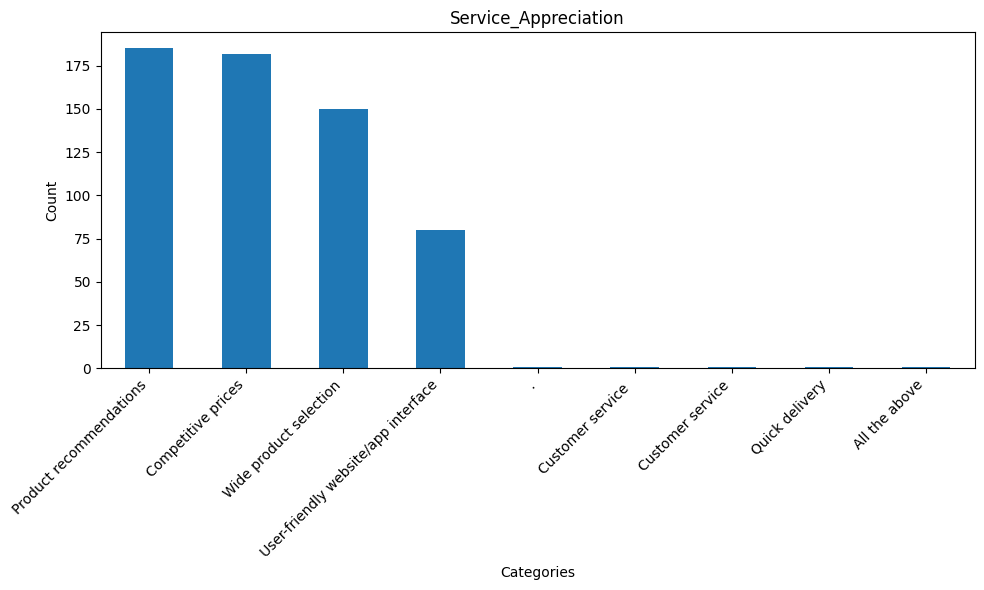

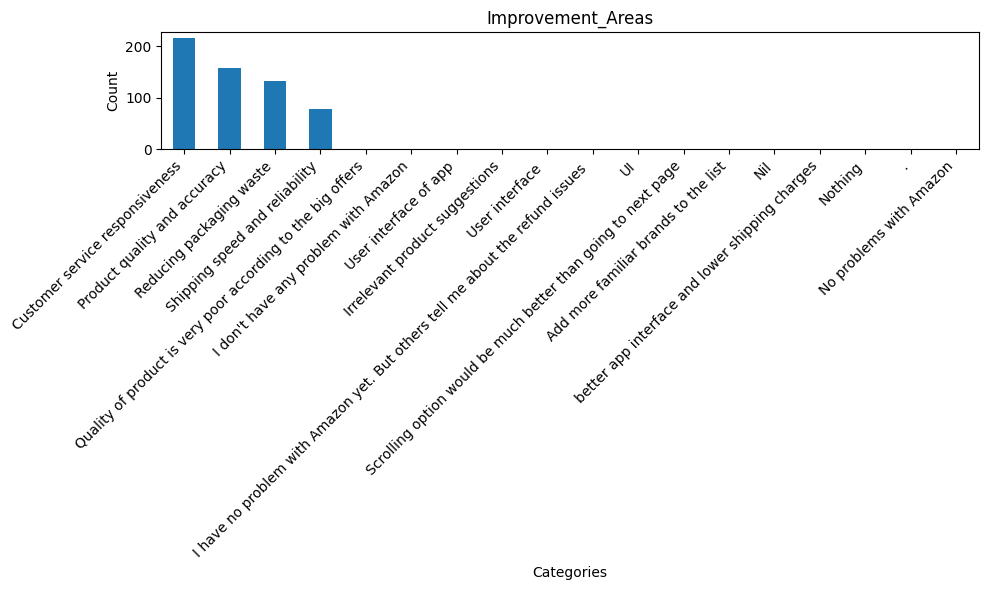

In [ ]:
cat_cols = data.select_dtypes(include = ['object']).drop(['Timestamp','Purchase_Categories'],axis= 1)  # dropping the columns 'Timestamp' and 'Purchase_Categories' because they need further feature engineering

for col in cat_cols.columns :
   plt.figure(figsize=(10, 6))  # Adjust the figure size

  # Count unique values and plot them as a bar chart
   cat_cols[col].value_counts().plot(kind='bar')

   plt.title(f'{col}')
   plt.xlabel('Categories')
   plt.ylabel('Count')
   plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if necessary
   plt.tight_layout()  # Adjust the layout
   plt.show()

 In columns `Improvement_Areas` and `Service_Appreciation`, categories with only one occurrence can be replaced with 'other' in data cleaning.

In [6]:
once = data['Improvement_Areas'].value_counts()
data['Improvement_Areas'].replace(once[once==1].index ,'other',inplace = True)

once = data['Service_Appreciation'].value_counts()
data['Service_Appreciation'].replace(once[once==1].index,'other',inplace = True)

data['Improvement_Areas'].value_counts(),data['Service_Appreciation'].value_counts()

(Improvement_Areas
 Customer service responsiveness    217
 Product quality and accuracy       159
 Reducing packaging waste           133
 Shipping speed and reliability      79
 other                               14
 Name: count, dtype: int64,
 Service_Appreciation
 Product recommendations                185
 Competitive prices                     182
 Wide product selection                 150
 User-friendly website/app interface     80
 other                                    5
 Name: count, dtype: int64)

# Feature engineering
* Split the complex columns into smaller ones.
* creat new Features
* preprocessing

In [7]:
# Split the complex columns into smaller ones.
# Extract the 'TimeStamp'
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='mixed')

# Extract the hour and day components, as the year and month can be ignored since all data was collected in June 2023 in GMT+5:30	 .
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour

# Extract the 'Purchase_Categories'
# Get the unique categories

unique_categories = data['Purchase_Categories'].str.split(';').explode().unique()

# Create new columns for each category and set to 0
for category in unique_categories:
    data[f'Purchase_Categories_{category}'] = 0

# Set the corresponding category column to 1 for each row
for index, row in data.iterrows():
    categories = row['Purchase_Categories'].split(';')
    for category in categories:
        data.at[index, f'Purchase_Categories_{category}'] = 1



In [ ]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Day', 'Hour',
       'Purchase_Categories_Beauty and Personal Care',
       'Purchase_Categories_Clothing and Fashion',
       'Purchase_Categories_Groceries and Gourmet Food',
       'Purchase_Categories_others', 'Purchase_Categories_Home and Kitchen'],
      dtype='object')

In [8]:
# normalize numerical data.
# Normalize 'Day' and 'Hour' using sin() and cos() for cyclical nature

data['Day_sin'] = np.sin((2*np.pi*data['Day'])/30)
data['Day_cos'] = np.cos(2*np.pi*data['Day']/30)

data['Hour_sin'] = np.sin(2*np.pi*data['Hour']/24)
data['Hour_cos'] = np.cos(2*np.pi*data['Hour']/24)

# using Z-Score for 'age'

data['age'] = (data['age']-np.mean(data['age']))/np.std(data['age'])

# using Ordinal Encoding for rest of the normial data becouse they are rating data

ordinalEncoder = OrdinalEncoder()
rating_cols = ['Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency', 'Rating_Accuracy ', 'Shopping_Satisfaction']
data[rating_cols] = ordinalEncoder.fit_transform(data[rating_cols])

# Dropping unnecessary columns.
data.drop(['Timestamp','Purchase_Categories','Day','Hour'],axis =1,inplace =True)

In [9]:
# Convert categorical variables to dummy/one-hot encoded variables
dummies_data = pd.get_dummies(data)
clean_data = dummies_data.copy()
dummies_data.shape

(602, 74)

# Clustering


In [10]:
# split the data for model
data_train, data_val = train_test_split(dummies_data, test_size=0.4, random_state=42)

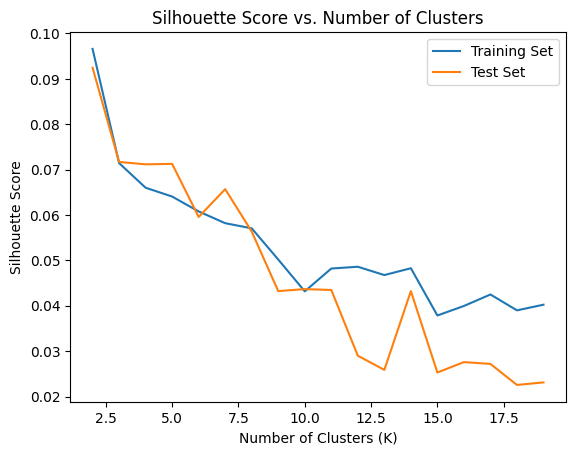

In [ ]:
# cluster sizes (2-19) to evaluate clustering quality via silhouette scores for both training and validation sets.
# It plots the silhouette scores to help determine the optimal number of clusters based on the peak values.

silhouette_scores_train = []
silhouette_scores_test = []
for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters,n_init=30)
    kmeans.fit(data_train)
    val_pred = kmeans.predict(data_val)
    silhouette_scores_test.append(silhouette_score(data_val, val_pred, metric='euclidean'))
    silhouette_scores_train.append(silhouette_score(data_train, kmeans.labels_, metric='euclidean'))

plt.plot(range(2, 20), silhouette_scores_train, label='Training Set')
plt.plot(range(2, 20), silhouette_scores_test, label='Test Set')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()

plt.show()

* Based on the Silhouette Analysis, the optimal number of clusters may be 4.

---

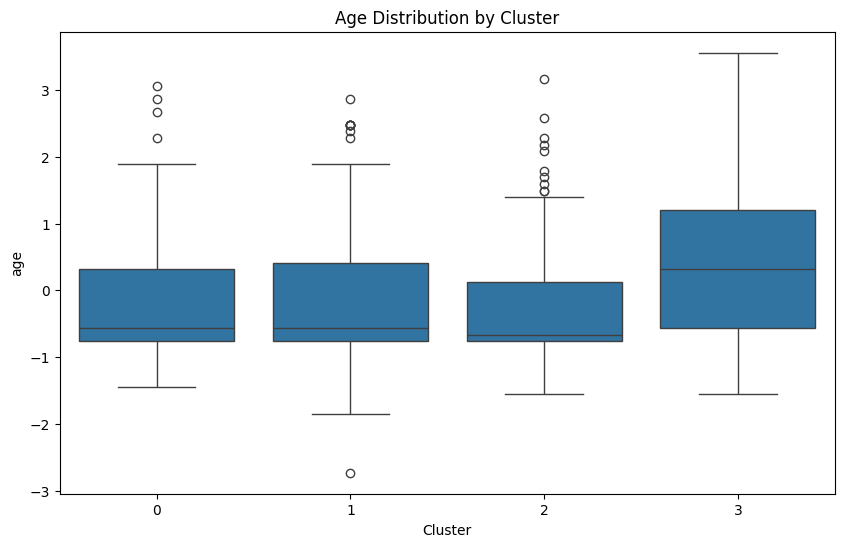

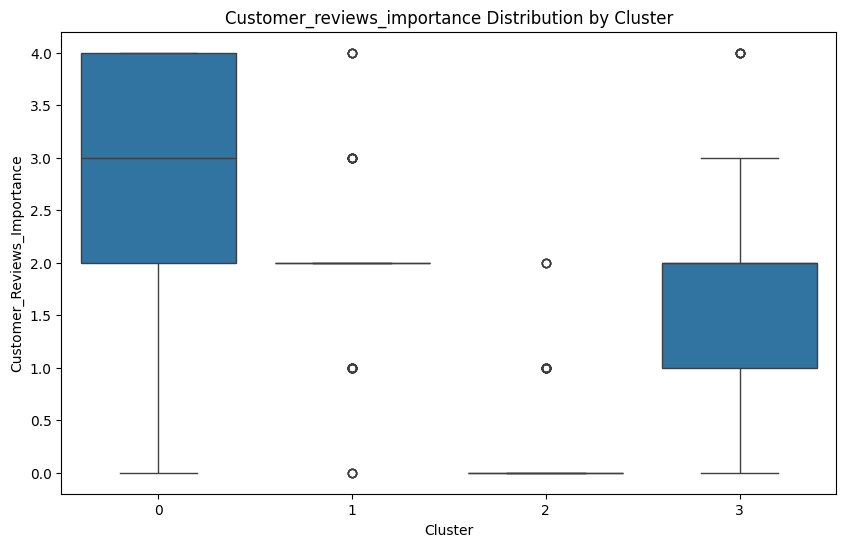

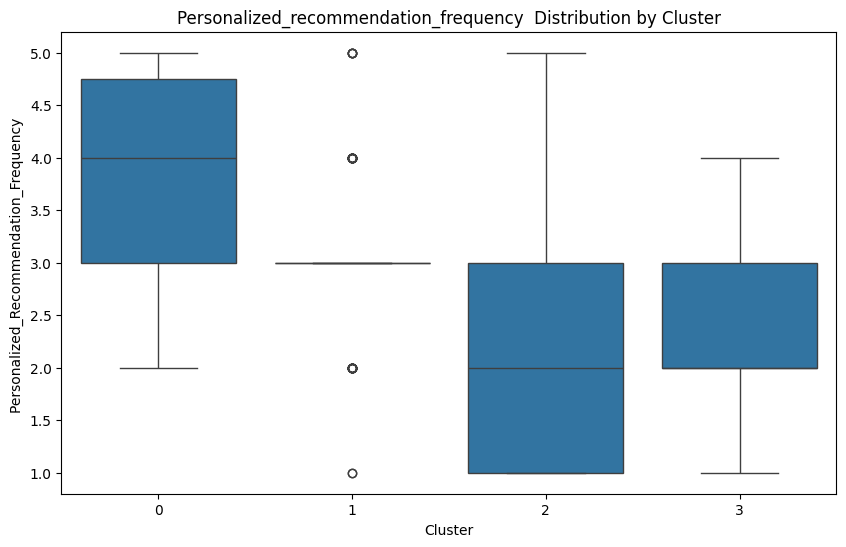

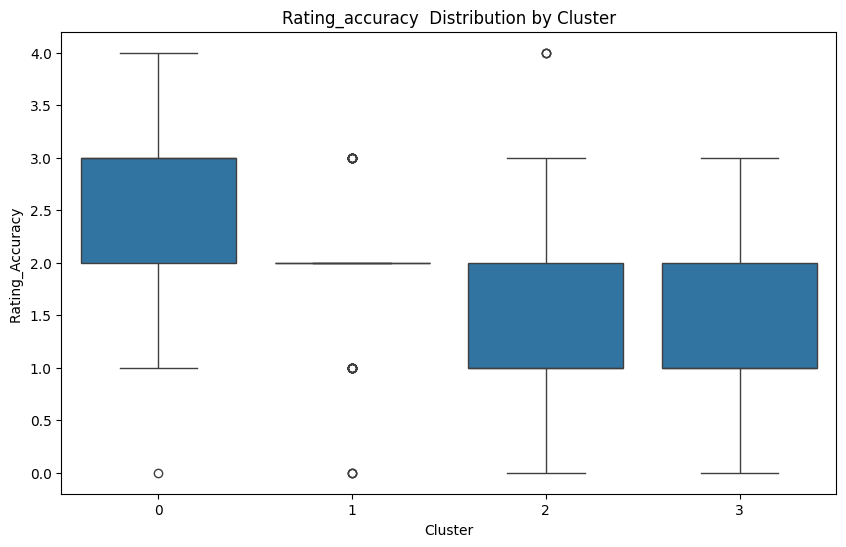

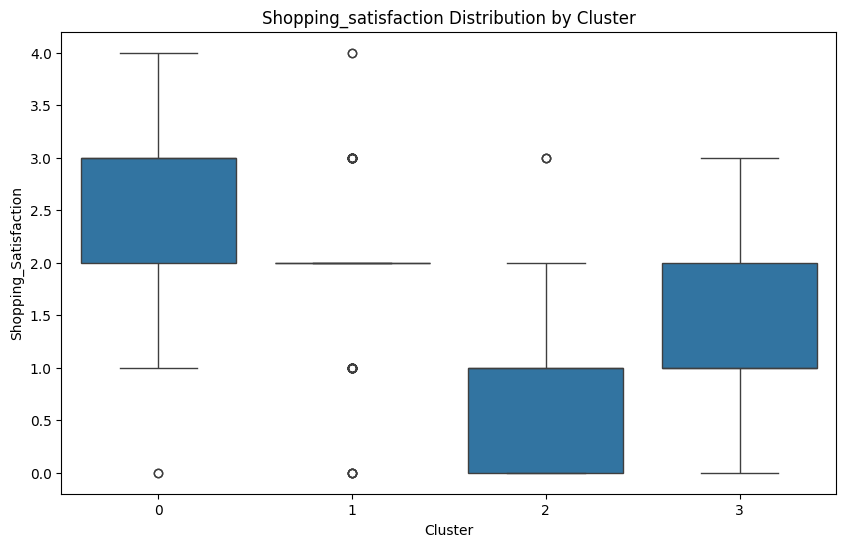

In [11]:
# Perform K-means clustering with 4 clusters and 30 initializations
opm_kmean = KMeans(n_clusters= 4 ,n_init=30)

opm_kmean.fit(dummies_data)

clean_data['Cluster'] = opm_kmean.labels_

# Plot boxplots to show the distribution of each numerical feature across clusters
for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=clean_data)
    plt.title(f'{feature.capitalize()} Distribution by Cluster')
    plt.show()

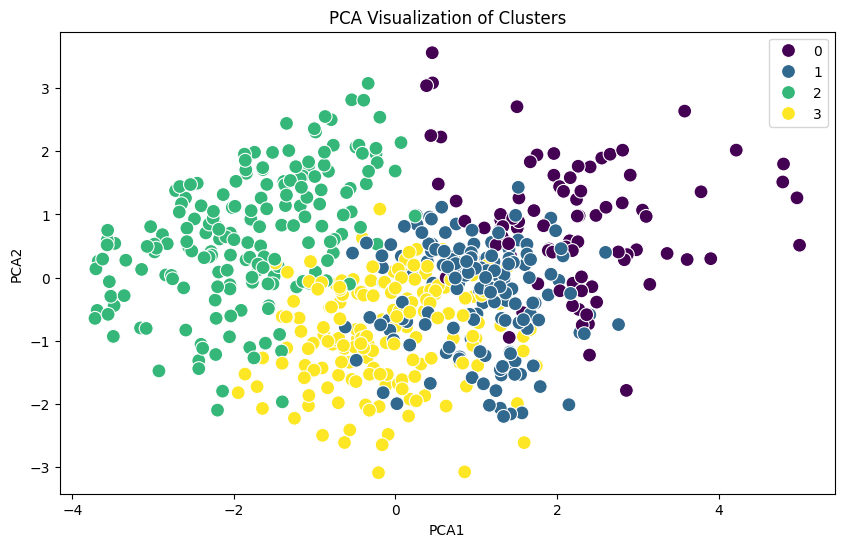

In [12]:
# Apply PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dummies_data)

clean_data['PCA1'] = pca_result[:, 0]
clean_data['PCA2'] = pca_result[:, 1]

# Plot a scatter plot of the PCA components.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=opm_kmean.labels_,data =clean_data , palette='viridis', s=100)
plt.title('PCA Visualization of Clusters')
plt.show()

In [15]:
# Save the cleaned data to a CSV file
clean_data.to_csv('cleanData.csv', index=False)

# Save the dummy variables data to a CSV file

dummies_data.to_csv('dummies.csv', index=False)

data.to_csv('processedData.csv', index =False)
print('All files have been uploaded successfully.')

All files have been uploaded successfully.
